# Import relevant libraries and load data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/melanieshi0120/Simple_Linear_Regression_python/master/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

`note`
- df['price'] is independent variable
- df[['sqft_living','condition','sqft_basement']] are dependent variables

# Distribution of Features

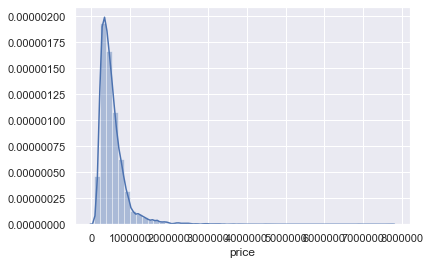

In [22]:
sns.distplot(df['price'])# check the distribution of y

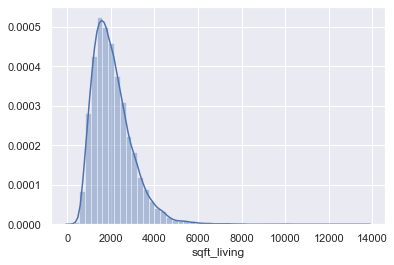

In [23]:
sns.distplot(df['sqft_living'])

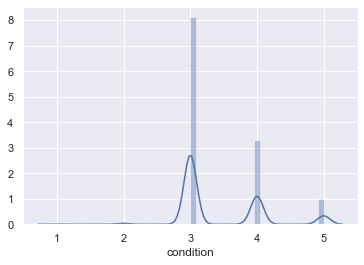

In [24]:
sns.distplot(df['condition'])

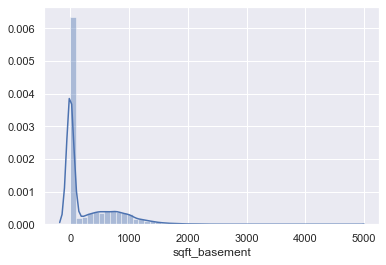

In [25]:
sns.distplot(df['sqft_basement'])

# feature engineering

In [26]:
# create a loop  to create a dummy variable
nd=[]
for i in df['sqft_basement']:
    if i==0:
        nd.append(0)
    else:
        nd.append(1)

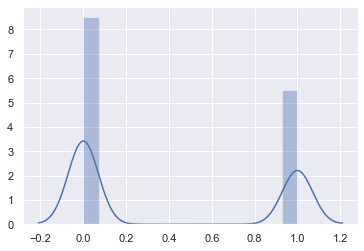

In [21]:
sns.distplot(nd)

In [27]:
df['sqft_basement']=nd

In [30]:
df['sqft_basement'].head()

0    0
1    1
2    0
3    1
4    0
Name: sqft_basement, dtype: int64

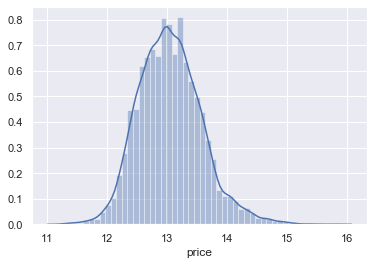

In [33]:
sns.distplot(np.log(df['price']))

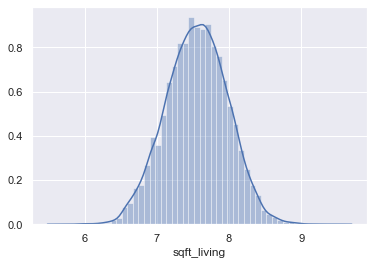

In [34]:
sns.distplot(np.log(df['sqft_living']))

In [41]:
df["log_sqft_living"]=np.log(df['sqft_living'])

# linearity and Homoskedasticity

In [35]:
# a function to generate scatter plots - before transformation and after transformation
def scatter_plot(x,y,t_x,t_y,title): 
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.scatter(x,y)
    plt.title('{} - Linearity Before Transformation'.format(title))
    plt.subplot(1,2,2)
    plt.scatter(t_x,t_y)
    plt.title('{} - Linearity After Transformation'.format(title))
    plt.tight_layout()

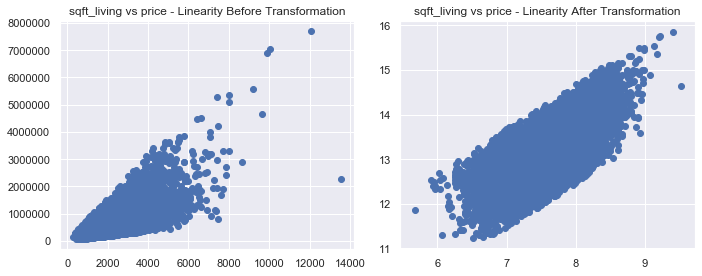

In [36]:
scatter_plot(df['sqft_living'],df['price'],np.log(df['sqft_living']),np.log(df['price']),"sqft_living vs price")

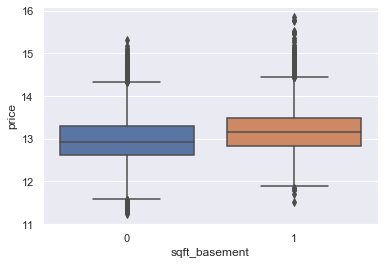

In [37]:
# box plot the  price mean of the houses without basements is smaller than the price mean of
# these houses with basements 
sns.boxplot(df['sqft_basement'], y=np.log(df['price']))

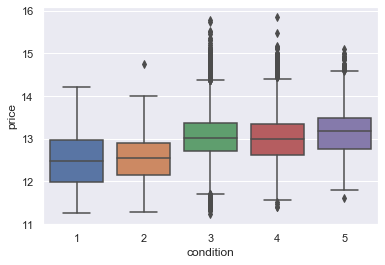

In [38]:
#the mean of the price also increases.
sns.boxplot(df['condition'], y=np.log(df['price']))

In [43]:
target=np.log(df['price'])

In [44]:
inputs=df[["log_sqft_living","condition","sqft_basement"]]

In [45]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", x_test.shape, "Target: ",y_test.shape)

Training set - Features:  (17290, 3) Target:  (17290,)
Test set- Features:  (4323, 3) Target:  (4323,)


In [46]:
from sklearn.linear_model import LinearRegression
# fit the model 
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
reg.score(x_train,y_train)

0.46269106247482916

In [48]:
reg.coef_

array([0.82924535, 0.05128494, 0.04277781])

In [49]:
reg.intercept_

6.596067235512397

In [51]:
test_y_hat=reg.predict(x_test)

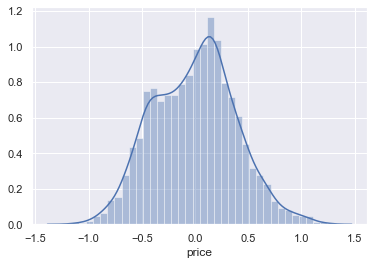

In [54]:
sns.distplot(y_test-test_y_hat)

In [56]:
train_y_hat=reg.predict(x_train)

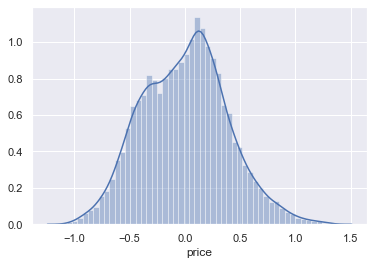

In [57]:
sns.distplot(y_train-train_y_hat)

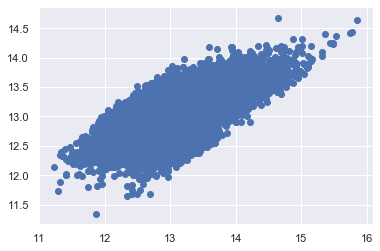

In [58]:
# the relationship between y_train and y_train prediction
plt.scatter(y_train,train_y_hat)


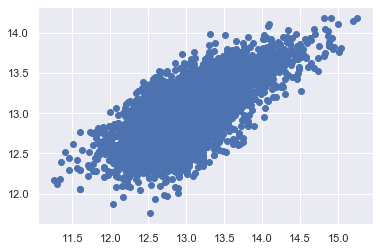

In [59]:
plt.scatter(y_test,test_y_hat)
